*Brian Blaylock*  
*September 12, 2018*

## HRRR Lightning Data

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')

from BB_HRRR.HRRR_Pando import get_hrrr_variable
from BB_maps.my_basemap import draw_HRRR_map

In [6]:
m = draw_HRRR_map()

In [23]:
DATE = datetime(2018, 9, 1)
H = get_hrrr_variable(DATE, 'LTNG:entire', fxx=5) 


 >> Dowloading tempfile: ./temp_hrrr_2018090100_f05_LTN.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180901/hrrr.t00z.wrfsfcf05.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180901/hrrr.t00z.wrfsfcf05.grib2.idx
 >> Matched a variable:  54:33300498:d=2018090100:LTNG:entire atmosphere:5 hour fcst:
 >> Byte Range: 33300498 33375758


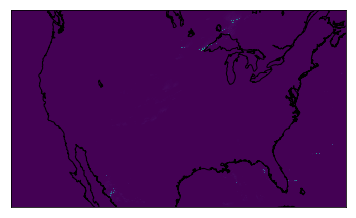

In [24]:
m.pcolormesh(H['lon'], H['lat'], H['value'], latlon=True)
m.drawcoastlines()

In [25]:
H['value'].max()

7.702